In [12]:
import os


base_path = r"E:\ML algoritme tl anfaldsdetektion vha HRV\LabView-Croping"

In [13]:
import neurokit2 as nk
from nptdms import TdmsFile

patient_path = r"E:\ML algoritme tl anfaldsdetektion vha HRV\ePatch data from Aarhus to Lausanne\Patients ePatch data\Patient 5\recording 1\Patient 5_1.tdms"

# Import the TDMS file
tdms_file = TdmsFile.read(patient_path)
data = tdms_file.as_dataframe()
print(data.head())

column_name = data.columns[0]
print("Column name:", column_name)

   /'Untitled'/'EKG'
0         -70.270817
1          -1.377859
2          37.202197
3         -45.469352
4        -144.675212
Column name: /'Untitled'/'EKG'


In [17]:


# Clean the signal using NeuroKit's clean_ecg function
cleaned_signal = nk.ecg_clean(data[column_name][:2000000], sampling_rate=512)

# Assess signal quality using NeuroKit's signal_quality function
signal_quality = nk.ecg_quality(cleaned_signal, sampling_rate=512)

signal_quality_raw = nk.ecg_quality(data[column_name][:2000000], sampling_rate=512)

r_peaks = nk.ecg_findpeaks(cleaned_signal, sampling_rate=512)


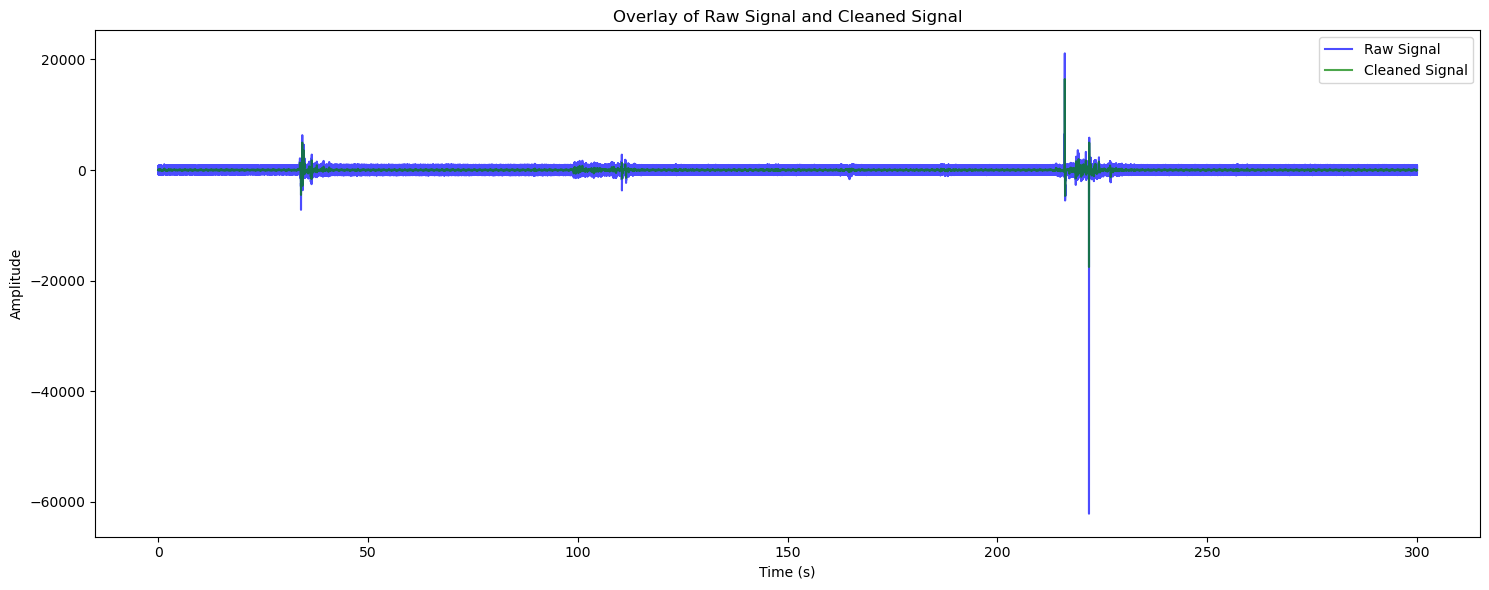

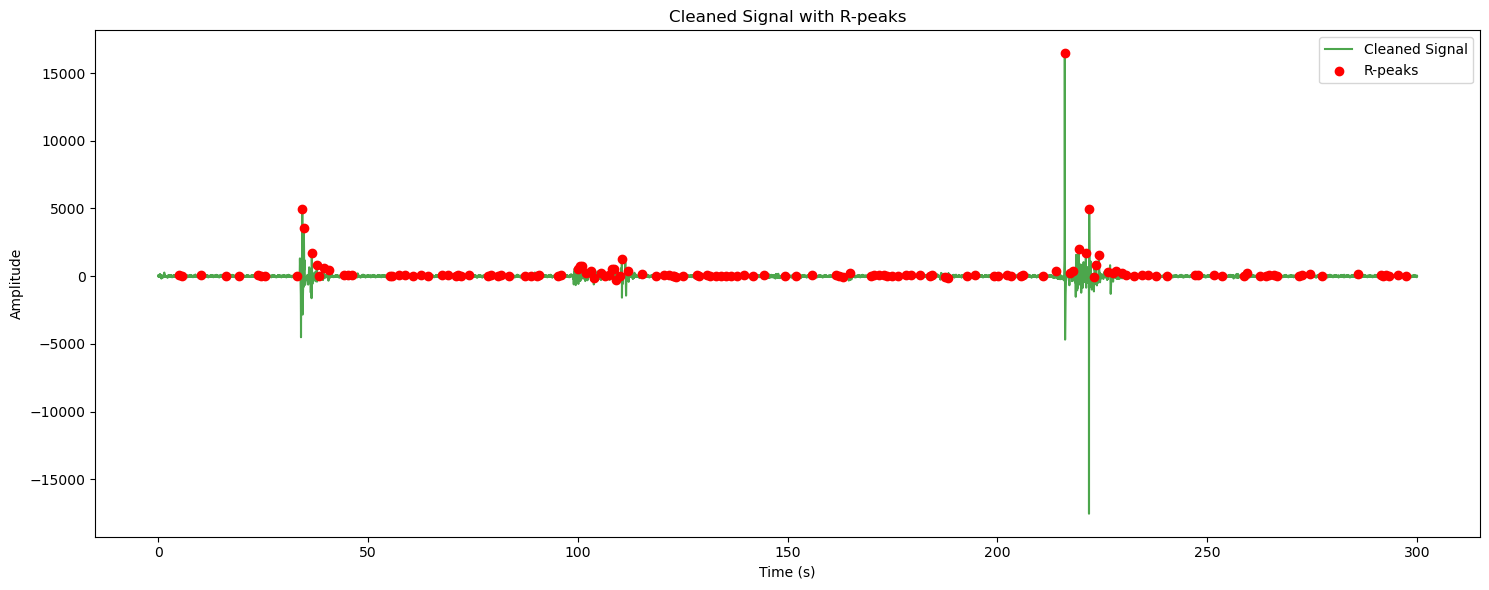

In [18]:
# Define the start time and window length
start_time = 360  # Start at 360 seconds
window_length = 300  # Show 300 seconds of data

# Calculate the start and end indices
start_index = int(start_time * sampling_rate)
end_index = start_index + int(window_length * sampling_rate)

# Adjust the time vector for the selected window
time_window = time[:window_length * sampling_rate]

# Plot the raw signal and cleaned signal as overlays in the same figure
plt.figure(figsize=(15, 6))

# Plot raw signal
plt.plot(time_window, data[column_name][start_index:end_index], label="Raw Signal", color="blue", alpha=0.7)

# Plot cleaned signal
plt.plot(time_window, cleaned_signal[start_index:end_index], label="Cleaned Signal", color="green", alpha=0.7)

# Add titles and labels
plt.title("Overlay of Raw Signal and Cleaned Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

# Plot the R-peaks on top of the cleaned signal
plt.figure(figsize=(15, 6))

# Plot cleaned signal
plt.plot(time_window, cleaned_signal[start_index:end_index], label="Cleaned Signal", color="green", alpha=0.7)

# Extract R-peaks within the selected window
r_peaks_indices = r_peaks['ECG_R_Peaks'][(r_peaks['ECG_R_Peaks'] >= start_index) & (r_peaks['ECG_R_Peaks'] < end_index)]
r_peaks_times = (r_peaks_indices - start_index) / sampling_rate  # Convert indices to time within the window
r_peaks_amplitudes = cleaned_signal[r_peaks_indices]  # Get amplitudes of R-peaks

# Plot R-peaks
plt.scatter(r_peaks_times, r_peaks_amplitudes, color="red", label="R-peaks", zorder=5)

# Add titles and labels
plt.title("Cleaned Signal with R-peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
# Count the number of R-peaks within the selected window
num_r_peaks_in_window = len(r_peaks_indices)
print("Number of R-peaks in the shown window:", num_r_peaks_in_window)

Number of R-peaks in the shown window: 150


In [21]:
# Calculate the differences between consecutive R-peak times
r_peaks_differences = np.diff(r_peaks_times)

# Find the minimum and maximum lengths between R-peaks
min_length = np.min(r_peaks_differences)
max_length = np.max(r_peaks_differences)

print("Minimum length between R-peaks in the window:", min_length)
print("Maximum length between R-peaks in the window:", max_length)

Minimum length between R-peaks in the window: 0.37109375
Maximum length between R-peaks in the window: 8.94921875
